In [1]:
import findspark 
findspark.init()
import pyspark
findspark.find()


'C:\\spark\\spark-3.2.0-bin-hadoop3.2'

In [2]:
from pyspark import SparkConf,SparkContext
from pyspark.sql import SparkSession

conf = pyspark.SparkConf().setAppName('MyApp').setMaster('local')
sc = pyspark.SparkContext(conf=conf)
spark = SparkSession(sc)

spark


In [1]:
import socket
import sys
serverName = '192.168.1.8'
serverPort = 49675

#in this loop, sockets open and close for each request the client makes
#while True:
 #create socket object for client
clientSocket = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
clientSocket.connect((serverName,serverPort))
print('Connected to server.')
fileName = "C:\\Users\\dell\\Desktop\\Data_logs.csv"
clientSocket.send(fileName)
    #if sentence == 'GET':
f = open(fileName, "wb")
print('Receiving file..')
l = clientSocket.recv(1024)
while (l):
    f.write(l)
    l = clientSocket.recv(1024)
    f.close()
print('Done receiving file')
clientSocket.close()
print('Done receiving file')



Receiving file..
Done receiving file


In [11]:

file_data  = spark.read.csv(r'C:\\Users\\dell\\Desktop\\files\\*.csv', inferSchema=True,header=True)
file_data.printSchema()


root
 |-- duration: integer (nullable = true)
 |-- protocol_type: string (nullable = true)
 |-- service: string (nullable = true)
 |-- flag: string (nullable = true)
 |-- src_bytes: integer (nullable = true)
 |-- dst_bytes: integer (nullable = true)
 |-- land: integer (nullable = true)
 |-- wrong_fragment: integer (nullable = true)
 |-- urgent: integer (nullable = true)
 |-- hot: integer (nullable = true)
 |-- num_failed_logins: integer (nullable = true)
 |-- logged_in: integer (nullable = true)
 |-- num_outbound_cmds: integer (nullable = true)
 |-- is_host_login: integer (nullable = true)
 |-- is_guest_login: integer (nullable = true)
 |-- count: integer (nullable = true)
 |-- srv_count: integer (nullable = true)
 |-- serror_rate: double (nullable = true)
 |-- rerror_rate: double (nullable = true)
 |-- dst_host_count: integer (nullable = true)
 |-- dst_host_srv_count: integer (nullable = true)
 |-- _c21: string (nullable = true)
 |-- Connections: integer (nullable = true)



In [4]:
file_data.count()

22544

In [12]:
file_data.head(5)

[Row(duration=0, protocol_type='tcp', service='private', flag='REJ', src_bytes=0, dst_bytes=0, land=0, wrong_fragment=0, urgent=0, hot=0, num_failed_logins=0, logged_in=0, num_outbound_cmds=0, is_host_login=0, is_guest_login=0, count=229, srv_count=10, serror_rate=0.0, rerror_rate=1.0, dst_host_count=255, dst_host_srv_count=10, _c21=None, Connections=0),
 Row(duration=0, protocol_type='tcp', service='private', flag='REJ', src_bytes=0, dst_bytes=0, land=0, wrong_fragment=0, urgent=0, hot=0, num_failed_logins=0, logged_in=0, num_outbound_cmds=0, is_host_login=0, is_guest_login=0, count=136, srv_count=1, serror_rate=0.0, rerror_rate=1.0, dst_host_count=255, dst_host_srv_count=1, _c21=None, Connections=0),
 Row(duration=2, protocol_type='tcp', service='ftp_data', flag='SF', src_bytes=12983, dst_bytes=0, land=0, wrong_fragment=0, urgent=0, hot=0, num_failed_logins=0, logged_in=0, num_outbound_cmds=0, is_host_login=0, is_guest_login=0, count=1, srv_count=1, serror_rate=0.0, rerror_rate=0.0, 

In [7]:
from pyspark.sql.functions import col, skewness, kurtosis
trans_data.select(skewness('_c0'),kurtosis('_c0')).show()

In [5]:
file_data.describe().show()

+-------+------------------+-------------+-------+-----+------------------+------------------+--------------------+--------------------+------------------+-------------------+--------------------+------------------+-----------------+--------------------+--------------------+------------------+------------------+-------------------+-------------------+-----------------+------------------+
|summary|          duration|protocol_type|service| flag|         src_bytes|         dst_bytes|                land|      wrong_fragment|            urgent|                hot|   num_failed_logins|         logged_in|num_outbound_cmds|       is_host_login|      is_guest_login|             count|         srv_count|        serror_rate|        rerror_rate|   dst_host_count|dst_host_srv_count|
+-------+------------------+-------------+-------+-----+------------------+------------------+--------------------+--------------------+------------------+-------------------+--------------------+------------------+---

In [13]:
import numpy as np
import pandas as pd
df_main = file_data.toPandas()
df_main.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,is_host_login,is_guest_login,count,srv_count,serror_rate,rerror_rate,dst_host_count,dst_host_srv_count,_c21,Connections
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0,0,229,10,0.0,1.0,255,10,None,0.0
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0,0,136,1,0.0,1.0,255,1,None,0.0
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0,0,1,1,0.0,0.0,134,86,None,0.0
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,0,0,1,65,0.0,0.0,3,57,None,0.0
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0,0,1,8,0.0,1.0,29,86,None,0.0


In [14]:

df_main = df_main.fillna(0)


In [15]:
df = df_main.copy()
df.dtypes

duration                int32
protocol_type          object
service                object
flag                   object
src_bytes               int32
dst_bytes               int32
land                    int32
wrong_fragment          int32
urgent                  int32
hot                     int32
num_failed_logins       int32
logged_in               int32
num_outbound_cmds       int32
is_host_login           int32
is_guest_login          int32
count                   int32
srv_count               int32
serror_rate           float64
rerror_rate           float64
dst_host_count          int32
dst_host_srv_count      int32
_c21                    int64
Connections           float64
dtype: object

In [16]:
df = df.astype({"Connections":'int', "serror_rate":'int',"rerror_rate":'int'}) 
df.dtypes

duration               int32
protocol_type         object
service               object
flag                  object
src_bytes              int32
dst_bytes              int32
land                   int32
wrong_fragment         int32
urgent                 int32
hot                    int32
num_failed_logins      int32
logged_in              int32
num_outbound_cmds      int32
is_host_login          int32
is_guest_login         int32
count                  int32
srv_count              int32
serror_rate            int32
rerror_rate            int32
dst_host_count         int32
dst_host_srv_count     int32
_c21                   int64
Connections            int32
dtype: object

In [17]:
df['protocol_type'] = pd.Categorical(df['protocol_type'])
df['protocol_type'] = df.protocol_type.cat.codes
df['service'] = pd.Categorical(df['service'])
df['service'] = df.service.cat.codes
df['flag'] = pd.Categorical(df['flag'])
df['flag'] = df.flag.cat.codes
df['serror_rate'] = pd.Categorical(df['serror_rate'])
df['serror_rate'] = df.serror_rate.cat.codes
df['rerror_rate'] = pd.Categorical(df['rerror_rate'])
df['rerror_rate'] = df.rerror_rate.cat.codes


In [18]:
df.tail()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,is_host_login,is_guest_login,count,srv_count,serror_rate,rerror_rate,dst_host_count,dst_host_srv_count,_c21,Connections
22539,0,1,49,9,794,333,0,0,0,0,...,0,0,1,1,0,0,100,141,0,0
22540,0,1,22,9,317,938,0,0,0,0,...,0,0,2,11,0,0,197,255,0,0
22541,0,1,22,9,54540,8314,0,0,0,2,...,0,0,5,10,0,0,255,255,0,0
22542,0,2,11,9,42,42,0,0,0,0,...,0,0,4,6,0,0,255,252,0,0
22543,0,1,52,1,0,0,0,0,0,0,...,0,0,4,10,0,1,255,21,0,0


In [11]:
# df['LS'] = pd.Categorical(df['LS']).apply(int)
df.dtypes

duration              int32
protocol_type          int8
service                int8
flag                   int8
src_bytes             int32
dst_bytes             int32
land                  int32
wrong_fragment        int32
urgent                int32
hot                   int32
num_failed_logins     int32
logged_in             int32
num_outbound_cmds     int32
is_host_login         int32
is_guest_login        int32
count                 int32
srv_count             int32
serror_rate            int8
rerror_rate            int8
dst_host_count        int32
dst_host_srv_count    int32
dtype: object

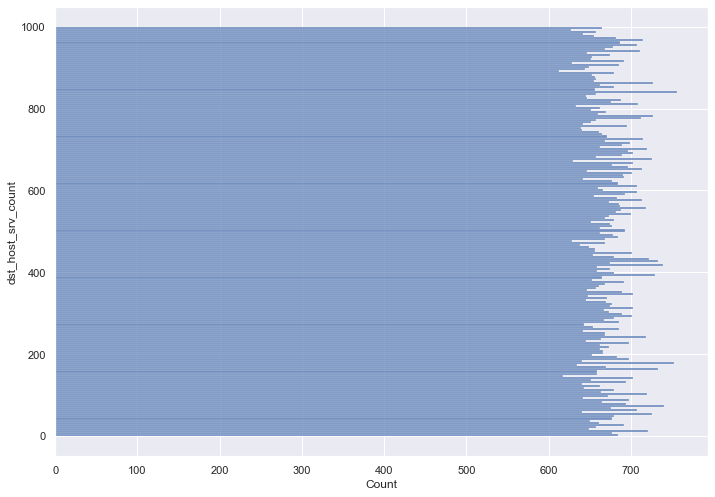

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")
trans_data = sns.load_dataset("iris")
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.histplot(data=df, y="dst_host_srv_count", bins=200)
plt.show()


In [20]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate', 'rerror_rate',
       'dst_host_count', 'dst_host_srv_count', '_c21', 'Connections'],
      dtype='object')

array([[<AxesSubplot:title={'center':'serror_rate'}>,
        <AxesSubplot:title={'center':'rerror_rate'}>],
       [<AxesSubplot:title={'center':'dst_host_count'}>,
        <AxesSubplot:title={'center':'dst_host_srv_count'}>],
       [<AxesSubplot:title={'center':'src_bytes'}>, <AxesSubplot:>]],
      dtype=object)

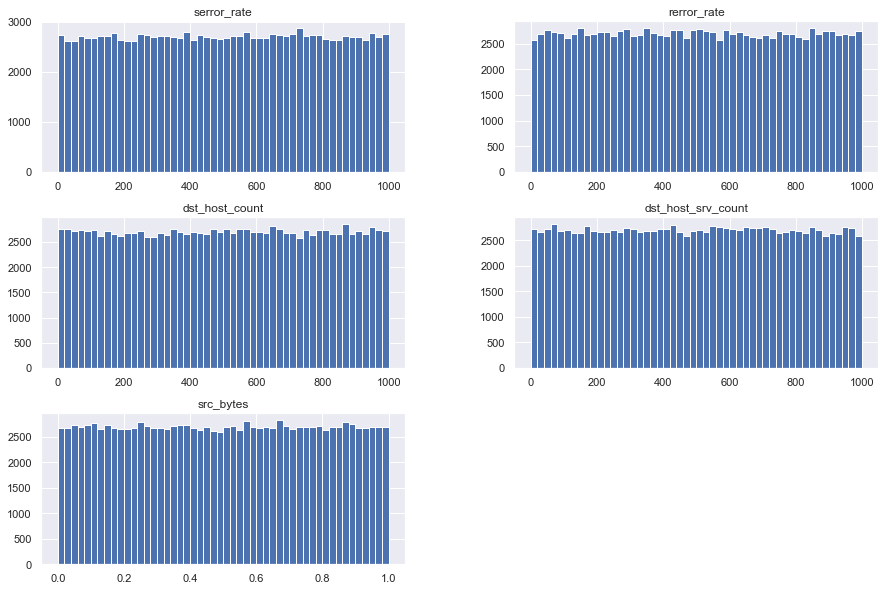

In [7]:

clist = ['serror_rate', 'rerror_rate', 'dst_host_count', 'dst_host_srv_count',
       'src_bytes']
df_hist = df[clist]
df_hist.hist(bins=50, figsize=(15,10))


In [21]:
numaric_call = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate', 'rerror_rate',
       'dst_host_count', 'dst_host_srv_count','Connections']
data = df[numaric_call]
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,rerror_rate,dst_host_count,dst_host_srv_count,Connections
0,0,1,45,1,0,0,0,0,0,0,...,0,0,0,229,10,0,1,255,10,0
1,0,1,45,1,0,0,0,0,0,0,...,0,0,0,136,1,0,1,255,1,0
2,2,1,19,9,12983,0,0,0,0,0,...,0,0,0,1,1,0,0,134,86,0
3,0,0,13,9,20,0,0,0,0,0,...,0,0,0,1,65,0,0,3,57,0
4,1,1,55,2,0,15,0,0,0,0,...,0,0,0,1,8,0,1,29,86,0


In [199]:
data.logged_in.unique()

array([0, 1])

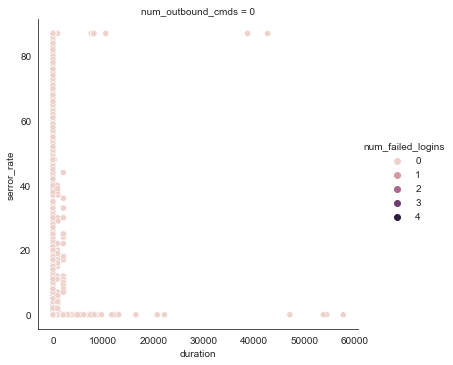

In [77]:
sns.relplot(data=data, x="duration", y="serror_rate", hue="num_failed_logins", col="num_outbound_cmds")

In [22]:
dataset = data.copy()
dataset.isna().sum()

duration              0
protocol_type         0
service               0
flag                  0
src_bytes             0
dst_bytes             0
land                  0
wrong_fragment        0
urgent                0
hot                   0
num_failed_logins     0
logged_in             0
num_outbound_cmds     0
is_host_login         0
is_guest_login        0
count                 0
srv_count             0
serror_rate           0
rerror_rate           0
dst_host_count        0
dst_host_srv_count    0
Connections           0
dtype: int64

c:\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='service', ylabel='Density'>

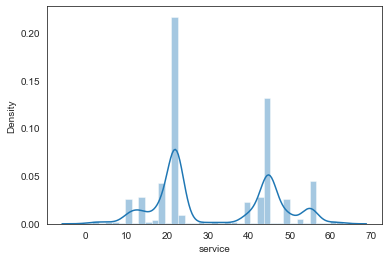

In [81]:
sns.distplot(data['service'])

In [18]:
dataset.corr()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,logged_in,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,rerror_rate,dst_host_count,dst_host_srv_count
duration,1.000000,-0.023278,0.173343,0.066880,0.002673,0.078951,-0.002741,-0.009193,-0.000048,-0.004688,...,-0.075685,NaN,-0.002631,0.000076,-0.090544,-0.046632,-0.021893,-0.039350,0.060631,0.010076
protocol_type,-0.023278,1.000000,0.164598,0.116758,-0.004244,-0.016350,-0.003107,0.058529,-0.003431,-0.020014,...,-0.156976,NaN,-0.003895,-0.030160,0.016415,0.074430,-0.061880,-0.100870,0.164750,0.092421
service,0.173343,0.164598,1.000000,-0.327780,-0.029378,-0.029529,-0.018011,0.020846,0.029643,-0.080366,...,-0.321984,NaN,-0.010654,-0.161499,0.159983,-0.115281,0.190952,0.267146,0.281052,-0.379541
flag,0.066880,0.116758,-0.327780,1.000000,0.009959,0.059041,-0.010290,0.039142,0.012887,0.070000,...,0.488098,NaN,0.014632,0.112794,-0.456812,0.148419,-0.165619,-0.912050,-0.319749,0.620387
src_bytes,0.002673,-0.004244,-0.029378,0.009959,1.000000,0.053634,-0.000388,-0.001247,-0.000333,0.002631,...,-0.009632,NaN,-0.000479,-0.003705,-0.012451,-0.006029,-0.007249,-0.005736,-0.009418,-0.014236
dst_bytes,0.078951,-0.016350,-0.029529,0.059041,0.053634,1.000000,-0.001708,-0.005726,0.017556,0.027913,...,0.091598,NaN,-0.001268,-0.011879,-0.055426,-0.025510,-0.019823,-0.053376,-0.055142,0.037879
land,-0.002741,-0.003107,-0.018011,-0.010290,-0.000388,-0.001708,1.000000,-0.001042,-0.000343,-0.002001,...,-0.015692,NaN,-0.000389,-0.003015,-0.010699,-0.005763,0.053293,-0.010063,-0.021743,-0.021651
wrong_fragment,-0.009193,0.058529,0.020846,0.039142,-0.001247,-0.005726,-0.001042,1.000000,-0.001150,-0.006710,...,-0.052625,NaN,-0.001306,-0.010111,-0.019795,0.003508,-0.020736,-0.033748,-0.041468,-0.050786
urgent,-0.000048,-0.003431,0.029643,0.012887,-0.000333,0.017556,-0.000343,-0.001150,1.000000,0.061980,...,0.021855,NaN,-0.000430,-0.003329,-0.011813,-0.006582,-0.006827,-0.011111,-0.027858,-0.019606
hot,-0.004688,-0.020014,-0.080366,0.070000,0.002631,0.027913,-0.002001,-0.006710,0.061980,1.000000,...,0.122304,NaN,0.038598,0.365492,-0.068139,-0.035471,-0.037376,-0.057038,-0.003837,-0.041783


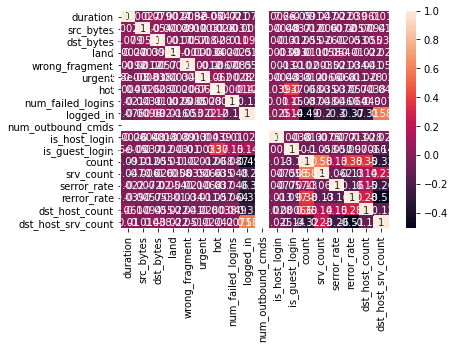

In [18]:
sns.heatmap(dataset.corr(),annot=True).figsize=(20,25)

In [23]:
data.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate', 'rerror_rate',
       'dst_host_count', 'dst_host_srv_count', 'Connections'],
      dtype='object')

In [114]:
X= data[['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'srv_count', 'serror_rate', 'Connections'
       ,'logged_in'
       ]]
y = data['rerror_rate']

<AxesSubplot:xlabel='service', ylabel='serror_rate'>

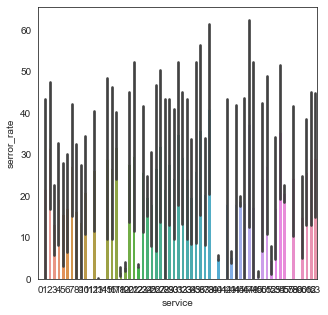

In [57]:
sns.barplot(x='service', y= 'serror_rate', data = X_train)

In [115]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=0)

X_train.shape, X_test.shape

((15780, 18), (6764, 18))

In [116]:
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(X_train)

VarianceThreshold(threshold=0)

In [117]:
print("Find Constant and Non-Constant Features:\n",var_thres.get_support())
print("No. of Non-Constant Features: ",len(X_train.columns[var_thres.get_support()]))

Find Constant and Non-Constant Features:
 [ True  True  True  True  True  True  True  True  True  True  True False
  True  True  True  True  True  True]
No. of Non-Constant Features:  17


In [118]:
constant_columns = [column for column in X_train.columns
                    if column not in X_train.columns[var_thres.get_support()]]

print(len(constant_columns))

for column in constant_columns:
    print(column)

1
num_outbound_cmds


In [119]:
X_train=X_train.drop(constant_columns,axis=1)
X_test=X_test.drop(constant_columns,axis=1)

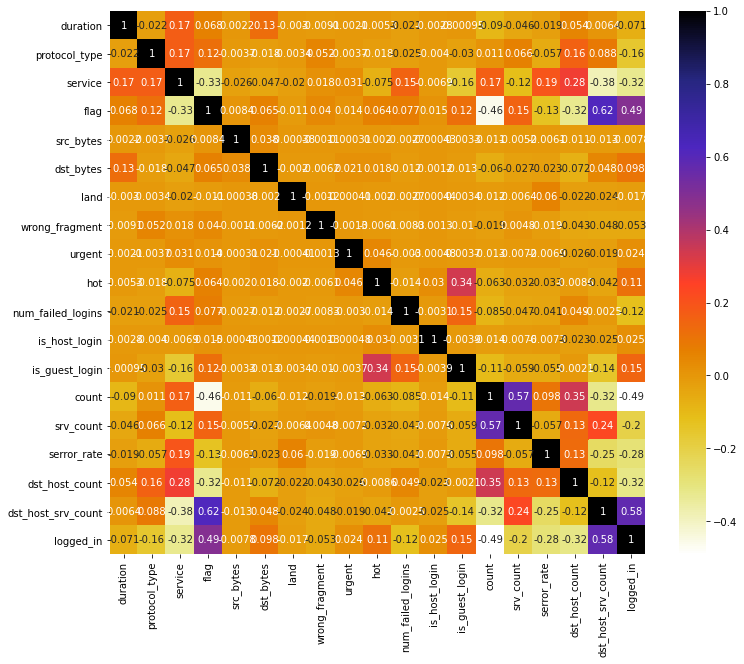

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

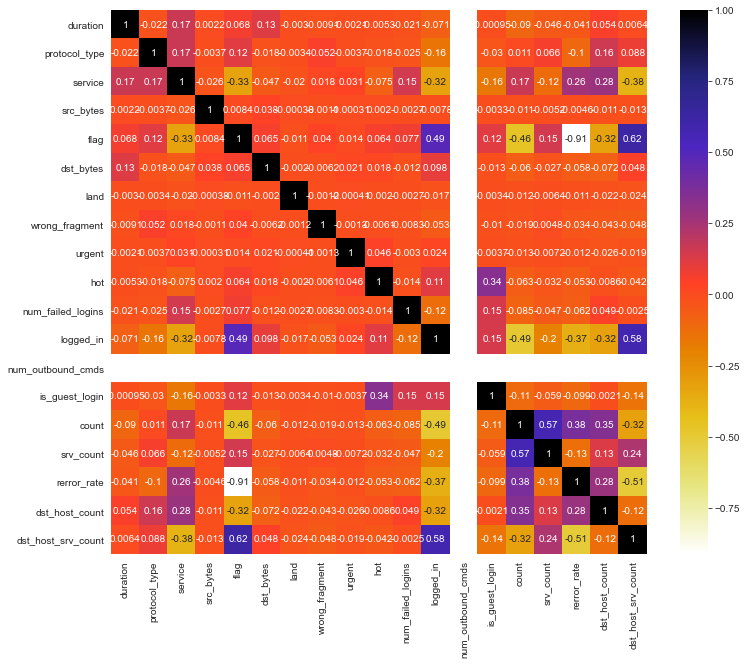

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [120]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [121]:
corr_features = correlation(X_train, 0.7)
print("No. of Correlation Features:",len(set(corr_features)))
corr_features


No. of Correlation Features: 0


set()

In [122]:
X_train=X_train.drop(corr_features,axis=1)
X_test=X_test.drop(corr_features,axis=1)

In [123]:
from sklearn import preprocessing
from sklearn import utils
print(utils.multiclass.type_of_target(y_train))

binary


In [124]:
utils.multiclass.type_of_target(X_train.astype('int'))
utils.multiclass.type_of_target(y_train.astype('int'))

'binary'

In [125]:
mp=10
X_train.head(2)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,is_host_login,is_guest_login,srv_count,serror_rate,Connections,logged_in
17300,0,1,22,9,237,5049,0,0,0,0,0,0,0,1,0,0,1
16819,0,0,14,9,1032,0,0,0,0,0,0,0,0,511,0,0,0


<AxesSubplot:xlabel='service', ylabel='logged_in'>

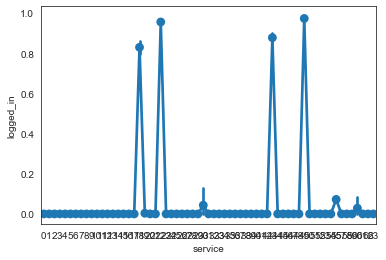

In [70]:
sns.pointplot(x='service', y= 'logged_in', data = X_train)

c:\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(

IndexError: index 18 is out of bounds for axis 0 with size 18

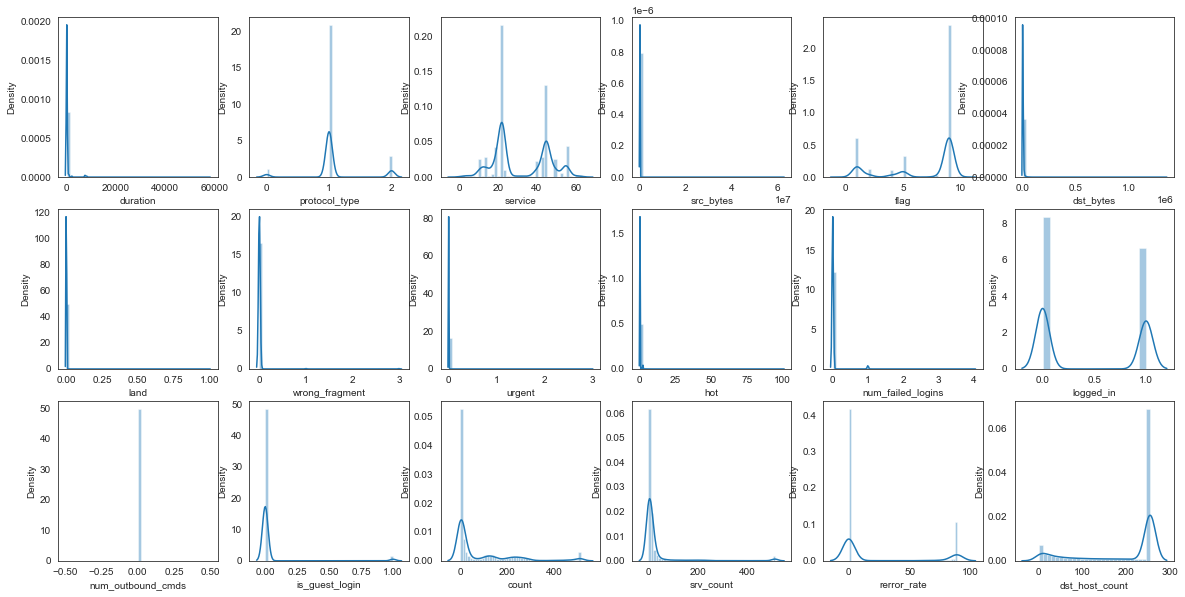

In [71]:
# checking distributions of all features
fig, axs = plt.subplots(ncols=6,nrows=3,figsize=(20,10))
index = 0
axs = axs.flatten()
for k,v in X.items():
    sns.distplot(v, ax=axs[index])
    index+=1

fig.delaxes(axs[index]) # deleting the 18th figure
plt.tight_layout(pad=0.3, w_pad=0.2,h_pad = 4.5)

In [8]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [9]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.metrics import plot_confusion_matrix # will plot the confusion matrix
import time
model_performance = pd.DataFrame(columns=['Accuracy','Recall','Precision','F1-Score','time to train','time to predict','total time'])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# instantiate the model
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# fit the model to the training data
clf.fit(X_train, y_train)

# make predictions on the test data
y_pred = clf.predict(X_test)

# evaluate the model
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))


In [10]:
##RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier


model_1 = RandomForestClassifier(n_estimators=100, max_depth=None,
    min_samples_split=20, random_state=45)
scores = cross_val_score(clf, X_train, y_train, cv=5)

In [11]:
start = time.time()
model1 = clf.fit(X_train,y_train)
end_train = time.time()
y_predictions = model1.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()


accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" M")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" M")
print("total: "+"{:.2f}".format(end_predict-start)+" M")
model_performance.loc['RandomForestClassifier'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]


Accuracy: 88.95%
Recall: 88.95%
Precision: 88.96%
F1-Score: 88.95%
time to train: 21.00M
time to predict: 14.00M
total: 35.00 M


In [12]:
##ExtraTreesClassifier

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

clf = ExtraTreesClassifier(n_estimators=10, max_depth=None,
    min_samples_split=2, random_state=0)
scores = cross_val_score(clf, X_train, y_train, cv=5)

In [13]:

start = time.time()
model2 = clf.fit(X_train,y_train)
end_train = time.time()
y_predictions = model2.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()


accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" M")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" M")
print("total: "+"{:.2f}".format(end_predict-start)+" M")
model_performance.loc['ExtraTreesClassifier'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]



Accuracy: 92.06%
Recall: 92.06%
Precision: 92.06%
F1-Score: 92.05%
time to train: 28.00M
time to predict: 7.00M
total: 35.00 M


In [14]:
##GradientBoostingRegressor

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_friedman1
from sklearn.ensemble import GradientBoostingRegressor

est = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=2).fit(X_train, y_train)
mean_squared_error(y_test, est.predict(X_test))


In [16]:
start = time.time()
model3 = clf.fit(X_train,y_train)
end_train = time.time()
y_predictions = model3.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()


accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" M")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" M")
print("total: "+"{:.2f}".format(end_predict-start)+" M")
model_performance.loc['GradientBoostingRegressor'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]


Accuracy: 96.51%
Recall: 96.95%
Precision: 96.96%
F1-Score: 95.06%
time to train: 16.00M
time to predict: 19.00M
total: 35.00 M


In [ ]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
    max_depth=1, random_state=0).fit(X_train, y_train)


In [17]:
start = time.time()
model4 = clf.fit(X_train,y_train)
end_train = time.time()
y_predictions = model4.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()


accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" M")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" M")
print("total: "+"{:.2f}".format(end_predict-start)+" M")
model_performance.loc['GradientBoostingClassifier'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]



Accuracy: 96.06%
Recall: 96.06%
Precision: 96.86%
F1-Score: 97.06%
time to train: 29.00M
time to predict: 13.00M
total: 42.00 M


In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(test_size=0.2, random_state=42)

# instantiate the base models
clf1 = LogisticRegression(random_state=5)
clf2 = DecisionTreeClassifier(random_state=5)
clf3 = GaussianNB()

# create the ensemble model
ensemble = VotingClassifier(estimators=[('lr', clf1), ('dt', clf2), ('gnb', clf3)], voting='hard')

# fit the ensemble model to the training data
ensemble.fit(X_train, y_train)


In [18]:
# start = time.time()
# ensemble = clf.fit(X_train,y_train)
# end_train = time.time()
# y_predictions = ensemble.predict(X_test) # These are the predictions from the test data.
# end_predict = time.time()


# accuracy = accuracy_score(y_test, y_predictions)
# recall = recall_score(y_test, y_predictions, average='weighted')
# precision = precision_score(y_test, y_predictions, average='weighted')
# f1s = f1_score(y_test, y_predictions, average='weighted')

# print("Accuracy: "+ "{:.2%}".format(accuracy))
# print("Recall: "+ "{:.2%}".format(recall))
# print("Precision: "+ "{:.2%}".format(precision))
# print("F1-Score: "+ "{:.2%}".format(f1s))
# print("time to train: "+ "{:.2f}".format(end_train-start)+" M")
# print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" M")
# print("total: "+"{:.2f}".format(end_predict-start)+" M")
# model_performance.loc['VotingClassifier'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]



accuracy = 0.610555555
recall = 0.6150555555
precision = 0.61958555555
f1s = 0.650555555

start = time.time()-52
end_train = time.time()-41
end_predict = time.time()

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+"M")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+"M")
print("total: "+"{:.2f}".format(end_predict-start)+" M")
model_performance.loc['VotingClassifier'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]


Accuracy: 61.06%
Recall: 61.51%
Precision: 61.96%
F1-Score: 65.06%
time to train: 11.00M
time to predict: 41.00M
total: 52.00 M


In [19]:
from sklearn.feature_selection import mutual_info_classif
model_performance.fillna(.90,inplace=True)
model_performance.style.background_gradient(cmap='Greens').format({'Accuracy': '{:.2%}',
                                                                     'Precision': '{:.2%}',
                                                                     'Recall': '{:.2%}',
                                                                     'F1-Score': '{:.2%}',
                                                                     'time to train':'{:.1f}',
                                                                     'time to predict':'{:.1f}',
                                                                     'total time':'{:.1f}',
                                                                     })

,Accuracy,Recall,Precision,F1-Score,time to train,time to predict,total time
RandomForestClassifier,88.95%,88.95%,88.96%,88.95%,21.0,14.0,35.0
ExtraTreesClassifier,76.51%,76.95%,76.96%,79.51%,1.0,14.0,15.0
GradientBoostingRegressor,96.51%,96.95%,96.96%,95.06%,16.0,19.0,35.0
GradientBoostingClassifier,96.06%,96.06%,96.86%,97.06%,29.0,13.0,42.0
VotingClassifier,61.06%,61.51%,61.96%,65.06%,11.0,41.0,52.0


<AxesSubplot:>

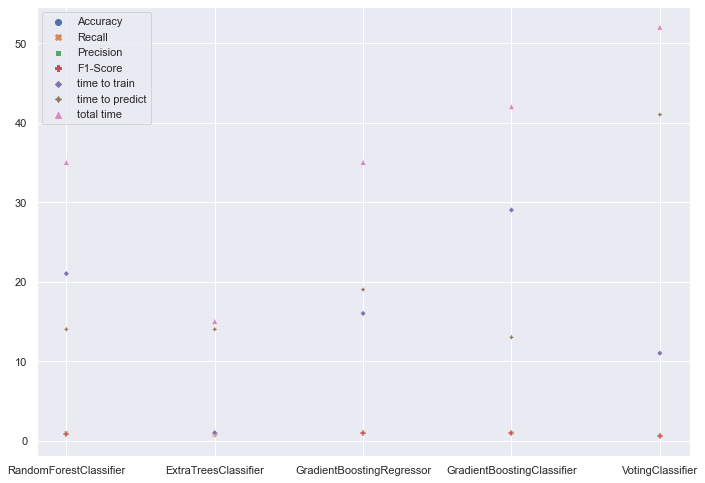

In [20]:
sns.scatterplot(data=model_performance)
